In [15]:
import os
import cv2
import numpy as np
import keras
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import backend as K
K.set_image_dim_ordering('tf')
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
print(tf.__version__)
from keras.utils.vis_utils import plot_model
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

1.12.0


In [2]:
PATH = os.getcwd()
data_path = PATH + '/dogs-vs-cats'
data_dir_list = os.listdir(data_path)
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        input_img_resize=cv2.resize(input_img,(128,128))         ## resize the image
        img_data_list.append(input_img_resize) 

Loaded the images of dataset-dog

Loaded the images of dataset-cat



In [3]:
img_data = np.array(img_data_list)    
img_data = img_data.astype('float32') 
img_data /= 255                       
print (img_data.shape)
print(len(img_data_list))                       

(25000, 128, 128, 3)
25000


In [4]:
num_classes = 2

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:12499]=0
labels[12500:24999]=1
names = {'dog':0,'cat':1}
Y = np_utils.to_categorical(labels, num_classes)

In [5]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(24,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(6,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

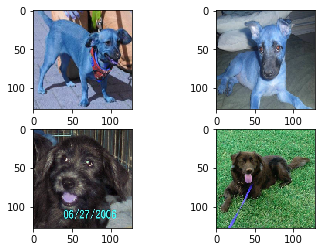

In [6]:
plt.subplot(221)
plt.imshow(img_data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(img_data[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(img_data[12498], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(img_data[12499], cmap=plt.get_cmap('gray'))

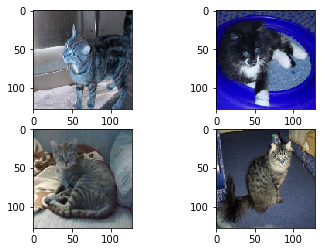

In [7]:
plt.subplot(221)
plt.imshow(img_data[12500], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(img_data[12501], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(img_data[24998], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(img_data[24999], cmap=plt.get_cmap('gray'))

In [8]:
from sklearn.model_selection import train_test_split

x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

22500
22500
2500
2500


[1. 0.]


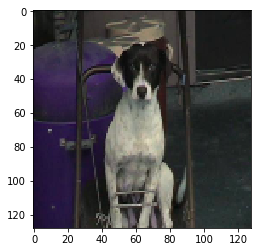

In [9]:
plt.imshow(X_train[12489])
print(y_train[12489])

[0. 1.]


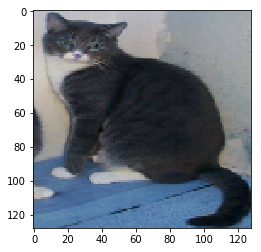

In [10]:
plt.imshow(X_train[11301])
print(y_train[11301])

In [11]:
input_shape=img_data[1].shape
model = Sequential()

model.add(Conv2D(32, (3,3),strides=(1,1),padding='same',input_shape = (128,128,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 63, 63, 32)        128       
__________

In [ ]:
'''keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))'''
'''
keras.layers.Conv1D(filters, kernel_size, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
'''

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,EarlyStopping

mc = ModelCheckpoint('./CatDogResults/catdog5.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='./CatDogResults/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('./CatDogResults/catdog5.csv',append=True)
ea = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [ ]:
hist = model.fit(X_train, y_train, batch_size=16, epochs=150, verbose=1, class_weight='auto',validation_split=0.2,callbacks=[mc,tb,cv,es])

In [ ]:
score = model.evaluate(X_test,y_test,verbose=1)
print(score[0])
print(score[1]*100)

In [ ]:
import matplotlib.pyplot as plt
print(hist.history.keys())
print(plt.plot(hist.history['loss'],'orange',label='train_loss'))
print(plt.plot(hist.history['val_loss'],'red',label='val_loss'))

In [ ]:
print(plt.plot(hist.history['acc'],'green',label='train_acc'))
print(plt.plot(hist.history['val_acc'],'blue',label='val_acc'))

In [ ]:
#from keras.models import load_model
#model2=load_model('/home/student/Documents/ActiveNeuron/Keras/CatDogResults/catdog.h5')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 110 #10 100
plt.imshow(X_test[image_index])model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
plt.imshow(X_test[image_index].reshape(128, 128, 3),cmap='viridis')
pred = model.predict(X_test[image_index].reshape(1, 128, 128, 3))
a=pred.argmax()
if (a==1):
    print("cat")
else:
    print("Dog")model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(2500):
    pred = model.predict(X_test[i].reshape(1, 128, 128, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(y_test[i])+" Predicted is "+str(pred.argmax()))

In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[13].reshape(1,128,128,3))

In [ ]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*5.5,col_size*3.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

### Augmentation

In [19]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,EarlyStopping

mc = ModelCheckpoint('./CatDogResults/catdog6.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='./CatDogResults/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('./CatDogResults/catdog6.csv',append=True)
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=20,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)  
    
datagen.fit(X_train)
hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size= 16),epochs= 150 ,samples_per_epoch=len(X_train),verbose=1,class_weight='auto', callbacks=[mc,tb,cv,es])

/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=150, verbose=1, class_weight="auto", callbacks=[<keras.ca..., steps_per_epoch=1406)`
  


Epoch 1/150
1406/1406 [==============================] - 68s 48ms/step - loss: 0.6825 - acc: 0.6059
Epoch 2/150
   3/1406 [..............................] - ETA: 1:17 - loss: 0.5075 - acc: 0.8125

/home/student/anaconda3/envs/gpu/lib/python3.6/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/home/student/anaconda3/envs/gpu/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1406/1406 [==============================] - 65s 47ms/step - loss: 0.5657 - acc: 0.7105
Epoch 3/150
1406/1406 [==============================] - 66s 47ms/step - loss: 0.4782 - acc: 0.7736
Epoch 4/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.4081 - acc: 0.8159
Epoch 5/150
1406/1406 [==============================] - 68s 48ms/step - loss: 0.3546 - acc: 0.8445
Epoch 6/150
1406/1406 [==============================] - 69s 49ms/step - loss: 0.3260 - acc: 0.8581
Epoch 7/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.2995 - acc: 0.8725
Epoch 8/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.2808 - acc: 0.8798
Epoch 9/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.2840 - acc: 0.8808
Epoch 10/150
1406/1406 [==============================] - 66s 47ms/step - loss: 0.2614 - acc: 0.8920
Epoch 11/150
1406/1406 [==============================] - 65s 47ms/step - loss: 0.2554 - acc: 0.8967
Epoch 12/1

1406/1406 [==============================] - 65s 46ms/step - loss: 0.1225 - acc: 0.9531
Epoch 84/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.1182 - acc: 0.9539
Epoch 85/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.1288 - acc: 0.9516
Epoch 86/150
1406/1406 [==============================] - 65s 47ms/step - loss: 0.1256 - acc: 0.9527
Epoch 87/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.1264 - acc: 0.9518
Epoch 88/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.1199 - acc: 0.9554
Epoch 89/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.1243 - acc: 0.9550
Epoch 90/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.1205 - acc: 0.9544
Epoch 91/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.1190 - acc: 0.9536
Epoch 92/150
1406/1406 [==============================] - 65s 46ms/step - loss: 0.1210 - acc: 0.9540
Epo

In [25]:
score = model.evaluate(X_test,y_test,verbose=1)
print(score[0])
print(score[1]*100)

2500/2500 [==============================] - 2s 647us/step
0.08964060695171357
96.67999999999999


In [26]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.97      1231
     class 1       0.97      0.96      0.97      1269

   micro avg       0.97      0.97      0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1194   37]
 [  46 1223]]


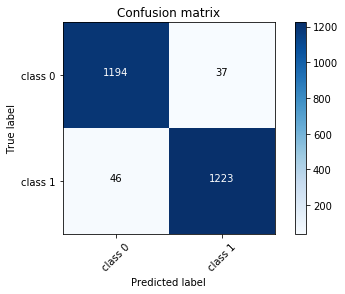

In [29]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,title='Confusion matrix')
plt.show()

In [ ]:
#display_activation(activations, 8,4,0)

In [ ]:
#display_activation(activations, 8,4,0)